In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('C:/Users/miant/Desktop/Python/Movies.csv')
dataset.head()

,Production Budget(M),Worldwide Gross Income (M),Genre
0,13,230,action
1,16,224,drama
2,15,221,thriller_suspense
3,14,202,adventure
4,16,198,adventure


In [3]:
#We define the X
X = dataset.iloc[:,[0,1]].values

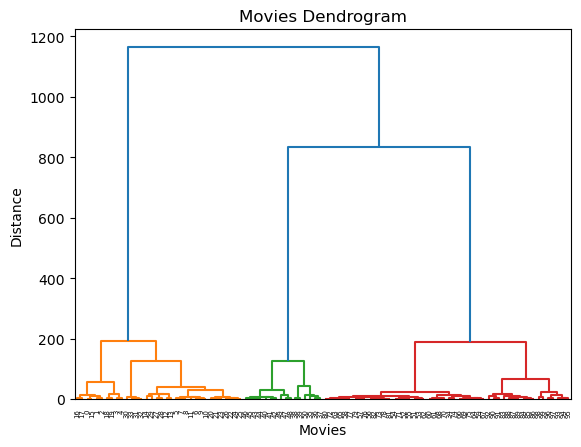

In [4]:
#We will conduct the dendrogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Movies Dendrogram')
plt.xlabel('Movies')
plt.ylabel('Distance')
plt.show()

We can see in the dendrogram that this dataset presents 3 clusters using the selected variables. 


In [7]:
#We need to train the model with the data
from sklearn.cluster import AgglomerativeClustering
h_clus = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
y = h_clus.fit_predict(X)

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

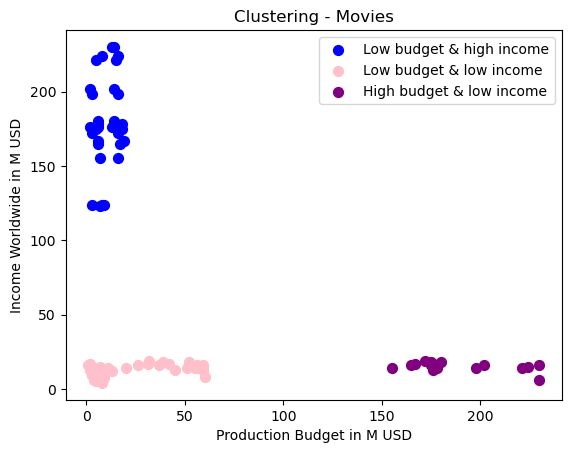

In [11]:
#We will visualise the clusters

plt.scatter(X[y==0,0], X[y==0,1], s= 50, c = 'blue', label = 'Low budget & high income')
plt.scatter(X[y==1,0], X[y==1,1], s= 50, c = 'pink', label = 'Low budget & low income')
plt.scatter(X[y==2,0], X[y==2,1], s= 50, c = 'purple', label = 'High budget & low income')
plt.title('Clustering - Movies')
plt.xlabel('Production Budget in M USD')
plt.ylabel('Income Worldwide in M USD')
plt.legend()


In [13]:
#Append the y into the dataset
dataset['Movie_Type'] = y

In [15]:
dataset

,Production Budget(M),Worldwide Gross Income (M),Genre,Movie_Type
0,13,230,action,0
1,16,224,drama,0
2,15,221,thriller_suspense,0
3,14,202,adventure,0
4,16,198,adventure,0
...,...,...,...,...
95,37,16,adventure,1
96,32,19,action,1
97,31,17,action,1
98,26,16,western,1
